In [1]:
# Importing libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from sklearn.tree import DecisionTreeClassifier

In [2]:
customer = pd.read_csv('Customer-Churn.csv')
customer

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
# Cleaning data

def cleaning (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

cleaning(customer)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
# Droping duplicated values

customer.drop_duplicates()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [5]:
# Checking data types

customer.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [6]:
# Ammending the "-" in the feature 'totalcharges'

customer['totalcharges'] = pd.to_numeric(customer['totalcharges'].replace(' ', pd.NA))
customer.select_dtypes('number')

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [8]:
# Counting the NA's

sum_na = customer.isna().sum()
sum_na

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64


In [14]:
# Dealing with the NA's - dropping

customer = customer.dropna()


In [17]:
# Checking data types

customer.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [16]:
# One Hot Enconding

# Ajusting target variable:

customer['churn'] = customer['churn'].replace({'Yes': 1, 'No': 0})

In [18]:
# One Hot Enconding on the Categorical columns

customer_cat = customer.select_dtypes('object').reset_index(drop = True)
customer_cat = pd.get_dummies(customer_cat, dtype = int)

def cleaning (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

cleaning(customer_cat)

,gender_female,gender_male,partner_no,partner_yes,dependents_no,dependents_yes,phoneservice_no,phoneservice_yes,onlinesecurity_no,onlinesecurity_no_internet_service,...,techsupport_yes,streamingtv_no,streamingtv_no_internet_service,streamingtv_yes,streamingmovies_no,streamingmovies_no_internet_service,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year
0,1,0,0,1,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,1,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,1,1,0,1,0,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
7028,1,0,0,1,0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
7029,1,0,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
7030,0,1,0,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0


In [19]:
# Concatenating the DS

customer_num = customer.select_dtypes('number').reset_index(drop = True)

customer_concat = pd.concat([customer_num, customer_cat], axis = 1).reset_index(drop = True)
customer_concat


,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_female,gender_male,partner_no,partner_yes,dependents_no,...,techsupport_yes,streamingtv_no,streamingtv_no_internet_service,streamingtv_yes,streamingmovies_no,streamingmovies_no_internet_service,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,1,1,0,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
7028,0,72,103.20,7362.90,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
7029,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
7030,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0


In [21]:
# Checking data inbalances

customer_concat['churn'].value_counts()

0    5163
1    1869
Name: churn, dtype: int64

In [22]:
# SMOTE

    # 1. Train Test Split

X = customer_concat.drop(['churn'], axis = 1)
Y = customer_concat['churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [23]:
    # 2. SMOTE application

sm = SMOTE(random_state = 0, sampling_strategy = 1.0)
X_train_SMOTE, Y_train_SMOTE = sm.fit_resample(X_train, Y_train)

In [25]:
     # 3. SMOTE Verification
    
Y_train_SMOTE.value_counts()

1    4130
0    4130
Name: churn, dtype: int64

In [26]:
    # 4. Applying the Logistic Model
    
model_lm = LogisticRegression()
model_lm.fit(X_train_SMOTE, Y_train_SMOTE)
result = model_lm.score(X_train_SMOTE, Y_train_SMOTE)
print("The accuracy of the model is = ", round(result,3))

The accuracy of the model is =  0.827


In [40]:
    # 5. Applying the Decision Tree
    
max_depth = range(1, 20)
test = []
train = []

In [41]:
for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, Y_train)
    test.append(model.score(X_test, Y_test))
    train.append(model.score(X_train, Y_train))

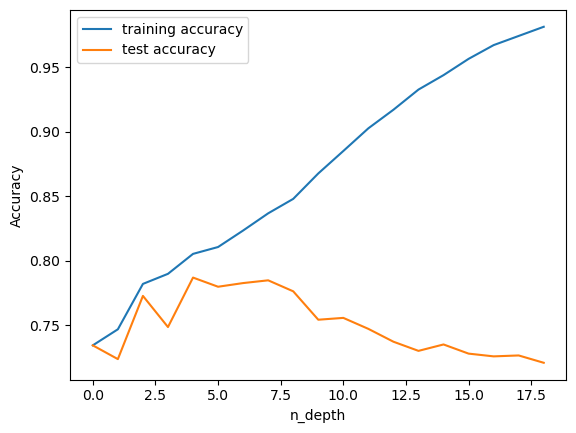

In [42]:
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

In [43]:
model_dt = DecisionTreeClassifier(max_depth = 4)
model_dt.fit (X_train_SMOTE, Y_train_SMOTE)
result = model_dt.score(X_train_SMOTE, Y_train_SMOTE)
print("The accuracy of the model is = ", round(result,3))

The accuracy of the model is =  0.819


In [ ]:
# From the above we conclude that the model with the best reaction to SMOTE was Logistic as it had a higher accuracy. 

In [45]:
    # TOMEKLINK
    
    # 1. Train Test Split
    
X = customer_concat.drop(['churn'], axis = 1)
Y = customer_concat['churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [46]:
    # 2. TOMEKLINK application
    
tl = TomekLinks()
X_train_TL, Y_train_TL = tl.fit_resample(X_train, Y_train)

In [47]:
    # 3. SMOTE Verification
    
Y_train_TL.value_counts()

0    3682
1    1495
Name: churn, dtype: int64

In [48]:
    # 4. Applying the Logistic Model
    
model_lm = LogisticRegression()
model_lm.fit(X_train_TL, Y_train_TL)
result = model_lm.score(X_train_TL, Y_train_TL)
print("The accuracy of the model is = ", round(result,3))

The accuracy of the model is =  0.814


In [49]:
    # 5. Applying the Decision Tree
    
model_dt = DecisionTreeClassifier(max_depth = 4)
model_dt.fit (X_train_TL, Y_train_TL)
result = model_dt.score(X_train_TL, Y_train_TL)
print("The accuracy of the model is = ", round(result,3))

The accuracy of the model is =  0.806
